In [1]:
import pandas as pd
data = pd.read_csv('ev_data_clean.csv', thousands=',')
data.head()

,County,LeaseVsPurchase,Vehicle Category,Make,Purchase Date,AgeGroup,Gender,Education,HousingType,RentOrOwn,Income
0,Orange,Lease,PHEV,Toyota,9/1/12,55.0,Male,Graduate degree,Detached House,Own,175000.0
1,Los Angeles,Lease,PHEV,Chevrolet,9/1/12,35.0,Male,Graduate degree,Detached House,Own,250000.0
2,Los Angeles,Lease,PHEV,Toyota,9/1/12,45.0,Male,Bachelor's degree,Detached House,Own,125000.0
3,Sacramento,Lease,BEV,Nissan,9/1/12,65.0,Female,Bachelor's degree,Detached House,Own,75000.0
4,Sonoma,Purchase,BEV,Nissan,9/1/12,45.0,Female,Graduate degree,Detached House,Own,175000.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19460 entries, 0 to 19459
Data columns (total 11 columns):
County              19460 non-null object
LeaseVsPurchase     19460 non-null object
Vehicle Category    19460 non-null object
Make                19460 non-null object
Purchase Date       19460 non-null object
AgeGroup            18616 non-null float64
Gender              18675 non-null object
Education           18863 non-null object
HousingType         19049 non-null object
RentOrOwn           18858 non-null object
Income              15432 non-null float64
dtypes: float64(2), object(9)
memory usage: 1.6+ MB


In [3]:
data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])
data['Purchase Date'].head()

0   2012-09-01
1   2012-09-01
2   2012-09-01
3   2012-09-01
4   2012-09-01
Name: Purchase Date, dtype: datetime64[ns]

In [4]:
data['Month_Year'] = data['Purchase Date'].apply(lambda x: x.strftime('%Y-%m'))
data['Month']      = data['Purchase Date'].dt.month
data['Weekday']    = data['Purchase Date'].dt.weekday
data['Year']       = data['Purchase Date'].dt.year 
data.Month_Year.head()

0    2012-09
1    2012-09
2    2012-09
3    2012-09
4    2012-09
Name: Month_Year, dtype: object

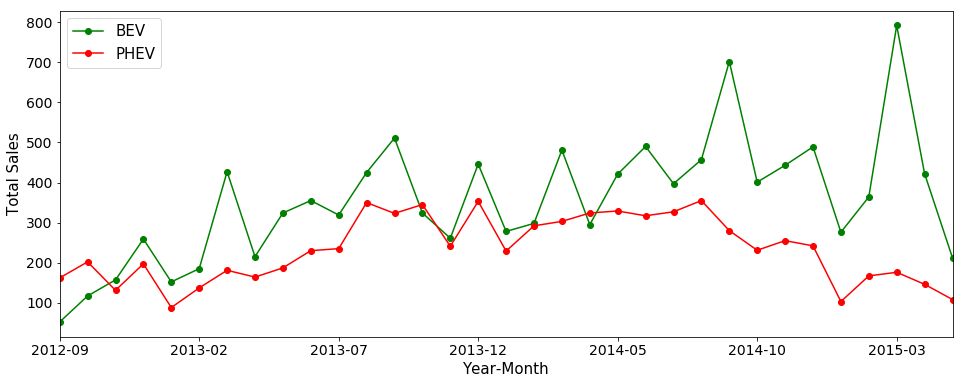

In [184]:
bev_sales  = data.loc[data['Vehicle Category'] == 'BEV',  'Month_Year']
phev_sales = data.loc[data['Vehicle Category'] == 'PHEV', 'Month_Year']

fig,ax = plt.subplots(ncols=1, figsize=(18,6))
bev_sales.value_counts().sort_index().plot(ax=ax, style='go-', figsize=(16,6), label='BEV', fontsize=14)
phev_sales.value_counts().sort_index().plot(ax=ax, style='ro-', figsize=(16,6), label='PHEV', fontsize=14)
ax.legend(loc='best',fontsize=15)
_ = ax.set_xlabel('Year-Month', fontsize=15)
_ = ax.set_ylabel('Total Sales', fontsize=15)

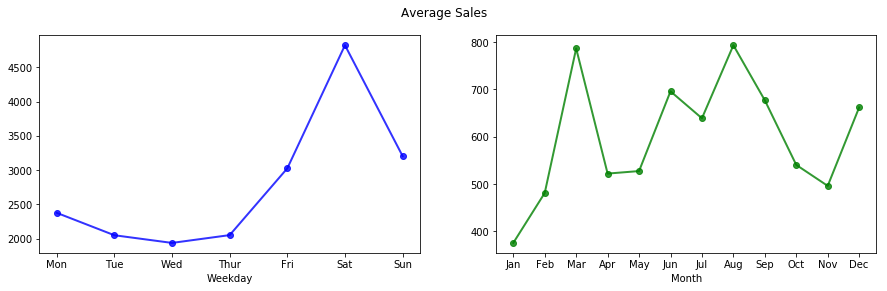

In [188]:
####Sales plots
fig,ax = plt.subplots(ncols=2, figsize=(15,4))
ax[0].plot(data.groupby('Weekday')['Month_Year'].count(),'bo-',lw=2, alpha=0.8)
ax[0].set_xlabel('Weekday')
ax[0].set_xticks((range(7)))
ax[0].set_xticklabels(['Mon', 'Tue','Wed','Thur','Fri','Sat','Sun'])
ax[1].plot(data.groupby('Month')['Month_Year'].count()/data.groupby('Month')['Year'].nunique(),'go-',lw=2, alpha=0.8)
ax[1].set_xlabel('Month')
ax[1].set_xticks((range(1,13)))
ax[1].set_xticklabels(['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
_ = fig.suptitle('Average Sales')

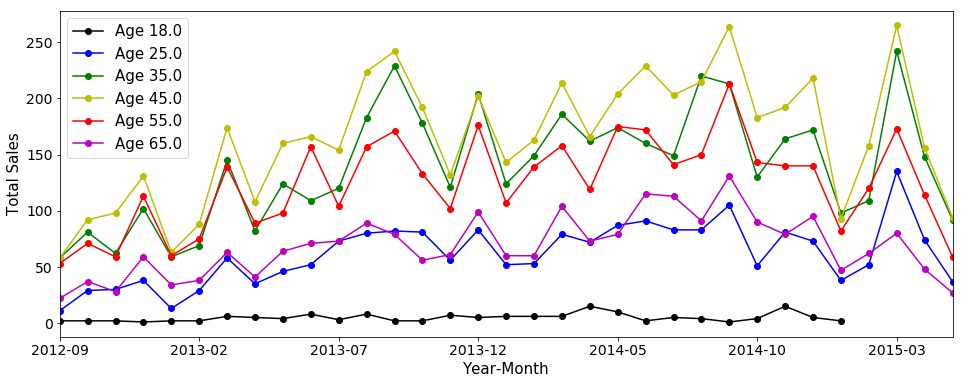

In [252]:
#age_25  = data.loc[data['AgeGroup'] == 25.0,  'Month_Year']
#age_35  = data.loc[data['AgeGroup'] == 35.0,  'Month_Year']
from matplotlib import cm
colors = {'18.0': 'k', '25.0':'b', '35.0':'g','45.0':'y', '55.0':'r', '65.0':'m'}
fig,ax = plt.subplots(ncols=1, figsize=(18,6))
for age in sorted(data['AgeGroup'].dropna().unique()):
    age_group = data.loc[data['AgeGroup'] == age, 'Month_Year']
    age_group.value_counts().sort_index().plot(ax=ax, style='-o', color=colors[str(age)], figsize=(16,6), label='Age '+str(age), fontsize=14)
#age_35.value_counts().sort_index().plot(ax=ax, style='ro-', figsize=(16,6), label='35', fontsize=14)
ax.legend(loc='best',fontsize=15)
_ = ax.set_xlabel('Year-Month', fontsize=15)
_ = ax.set_ylabel('Total Sales', fontsize=15)

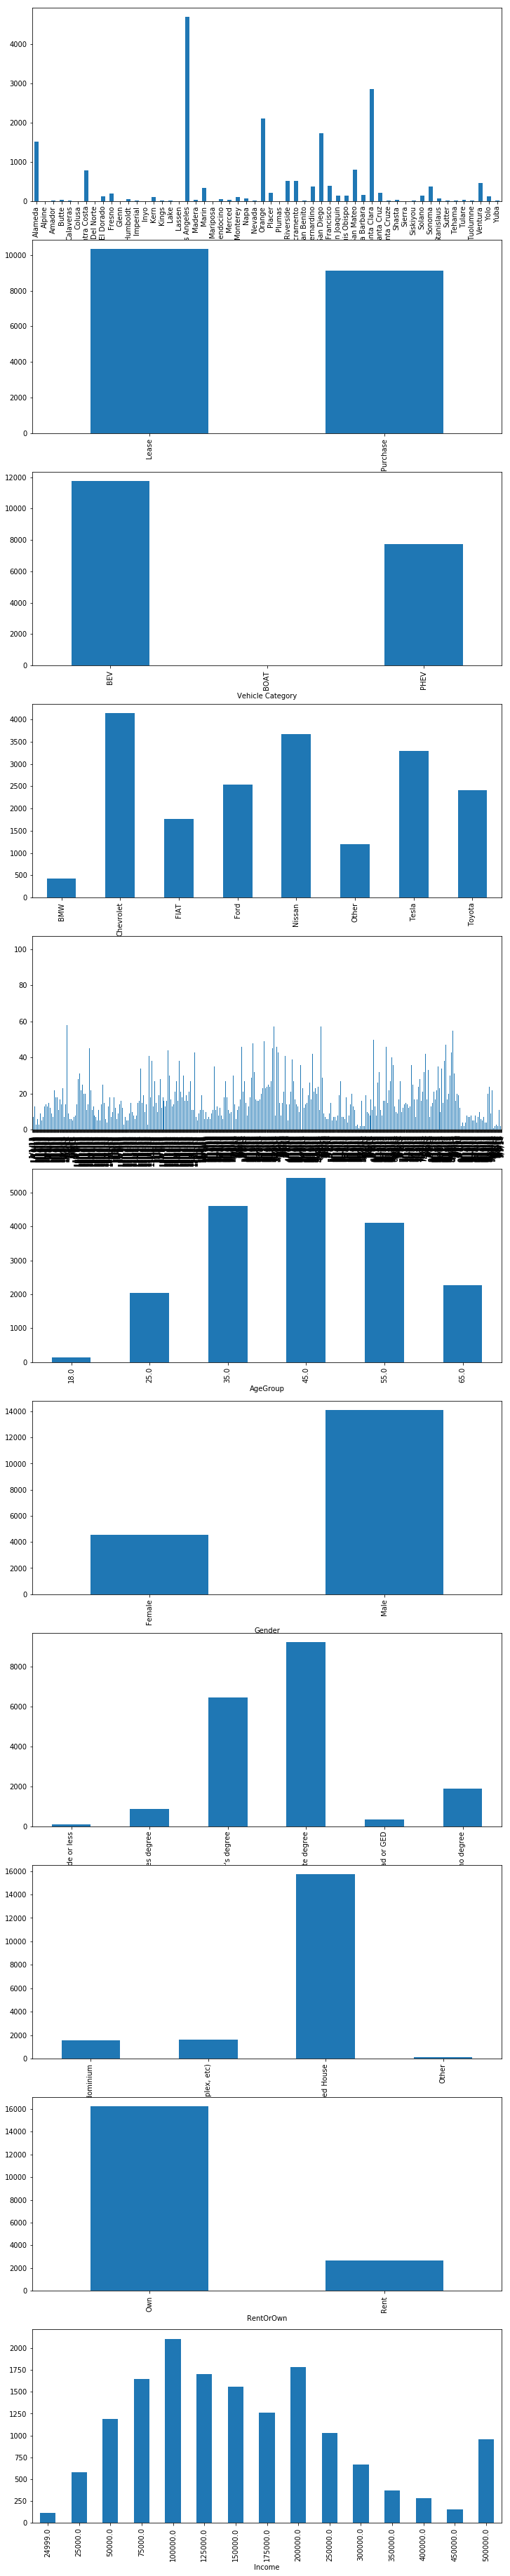

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
n = len(data.columns)
fig,ax = plt.subplots(nrows=n, figsize=(12, 6*n))
i=0
for col in data.columns:
    data[col].value_counts().sort_index().plot.bar(ax=ax[i])
    ax[i].set_xlabel(col)
    i+=1